# "parts of form" explorer
# developed by Kow Kuroda (kow.kuroda@gmail.com)
# History
2024/09/13 Created

In [51]:
#!pip install -U pyLDAvis
#!pip install -U pandas

In [52]:
## imports
import os, sys
import pprint as pp
import unicodedata

In [53]:
## 一つ上の階層のファイルを見るように設定
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))

In [54]:
## Cython module の生成 (必要に応じて)
#!python clean setup.py build_ext --inplace

In [55]:
## Cython を使うかどうか
use_Cython = False
if use_Cython:
    %load_ext Cython

In [56]:
# frequency rank range for terms to show
highest_freq_rank_for_terms_to_show = 1
lowest_freq_rank_for_terms_to_show  = 100
rank_range  = (highest_freq_rank_for_terms_to_show, lowest_freq_rank_for_terms_to_show)
print(f"rank_range: {rank_range}")

rank_range: (1, 100)


In [57]:
## term settings
term_classes        = [ 'spell', 'sound' ]
term_class          = term_classes[1]
ngram_is_inclusive  = True
inclusion_degree    = None

## doc settings
max_doc_size        = 11
min_doc_size        =  3
print(f"max_doc_size: {max_doc_size}")
print(f"min_doc_size: {min_doc_size}")

### boundary handling
mark_boundaries     = True
boundary_mark       = "#"

## term setting
term_is_skippy      = False
gap_mark            = "…"
seg_joint           = ""

### accent handling
suppress_accents    = True
accent_marks        = [ "ˈ", "ˌ" ] 
if term_class == 'sound':
    if suppress_accents:
        accent_status = "-unaccented"
    else:
        accent_stratus = "-accented"
else:
    accent_status = ""
print(f"accent_status: {accent_status}")

max_doc_size: 11
min_doc_size: 3
accent_status: -unaccented


In [58]:
## settings for language
## a key must be part of a file name 
target_lang_dict = {    'en_US' : 'English (US)',
                        'en_UK' : 'English (UK)',
                        'en_N_only' : 'English noun (WN)',
                        'en_V_only' : 'English verb (WN)',
                        'en_A_only' : 'English adj (WN)',
                        'en_R_only' : 'English adv (WN)',
                        'ar'    : 'Arabic',
                        'de'    : 'German',
                        'de_N_only' : 'German noun',
                        'de_non_N_only' : 'German non-noun',
                        'eo'    : 'Esperanto',
                        'es_ES' : 'Spanish (Spain)',
                        'es_MX' : 'Spanish (Mexico)',
                        'fi'    : 'Finnish',
                        'fr_FR' : 'French (France)',
                        'fr_QC' : 'French (Quebec)',
                        'is'    : 'Icelandic',
                        'ir'    : 'Irish',
                        'nl'    : 'Dutch',
                        'ro'    : 'Romanian',
                        'sw'    : 'Swahili' }
## proper language selection
target_lang_keys = [    'en_US', # 0
                        'en_UK', # 1
                        'en_N_only', # 2
                        'en_V_only', # 3
                        'en_A_only', # 4
                        'en_R_only', # 5
                        'ar', # 6
                        'de', # 7
                        'de_N_only', # 8
                        'de_non_N_only', # 9
                        'eo', 'es_ES', 'es_MX',
                        'fi', 'fr_FR', 'fr_QC',
                        'is', 'nl', 'ro', 'sw',
                        'ir' # This lacks sound
                    ]
## check
target_lang_key  = target_lang_keys[6]
print(f"target_lang_key: {target_lang_key}")
lang_name = target_lang_dict[target_lang_key]
print(f"target lang: {lang_name} [{target_lang_key}]")

## target_attr [effective only for Irish]
target_class = ""

#target_class = None # This causes an unrediable error
if target_lang_key == "ir":
    target_classes = [ 'adjectives', 'nouns', 'verbs' ]
    target_class = f"-{target_classes[3]}"
print(f"target_class: {target_class}")

target_lang_key: ar
target lang: Arabic [ar]
target_class: 


In [59]:
## sampling
source_sampling          = True
source_sampling_rate     = 0.5
source_sampling_max_size = 5000
second_sampling          = False
second_sampling_rate     = 0.7

In [60]:
## set target files
import glob
data_dir1      = "data/open-dict-ipa/data1"
data_dir2      = "data/open-dict-ipa/data1a"
data_dir3      = "data/wn3"
data_dir4      = "data/irish"
target_files   = glob.glob(f"{data_dir1}/*")
target_files2  = glob.glob(f"{data_dir2}/*")
target_files.extend(target_files2)
target_files3  = glob.glob(f"{data_dir3}/*")
target_files.extend(target_files3)
target_files4  = glob.glob(f"{data_dir4}/*")
target_files.extend(target_files4)
#
target_files = sorted([ file for file in target_files if ".csv" in file ])
pp.pprint(target_files)

['data/irish/word-irish-adjectives-spell.csv',
 'data/irish/word-irish-noun-phrases-spell.csv',
 'data/irish/word-irish-nouns-spell.csv',
 'data/irish/word-irish-possessives-spell.csv',
 'data/irish/word-irish-prepositions-spell.csv',
 'data/irish/word-irish-verbs-spell.csv',
 'data/open-dict-ipa/data1/ar.csv.gz',
 'data/open-dict-ipa/data1/de.csv.gz',
 'data/open-dict-ipa/data1/en_UK.csv.gz',
 'data/open-dict-ipa/data1/en_US.csv.gz',
 'data/open-dict-ipa/data1/eo.csv.gz',
 'data/open-dict-ipa/data1/es_ES.csv.gz',
 'data/open-dict-ipa/data1/es_MX.csv.gz',
 'data/open-dict-ipa/data1/fa.csv.gz',
 'data/open-dict-ipa/data1/fi.csv.gz',
 'data/open-dict-ipa/data1/fr_FR.csv.gz',
 'data/open-dict-ipa/data1/fr_QC.csv.gz',
 'data/open-dict-ipa/data1/is.csv.gz',
 'data/open-dict-ipa/data1/ja.csv.gz',
 'data/open-dict-ipa/data1/jam.csv.gz',
 'data/open-dict-ipa/data1/ma.csv.gz',
 'data/open-dict-ipa/data1/nb.csv.gz',
 'data/open-dict-ipa/data1/nl.csv.gz',
 'data/open-dict-ipa/data1/or.csv.gz',
 '

In [61]:
## get source data from files
import pandas as pd
import gzip
#target_language_key = "en_US" # can be changed to get other languages
#if target_class != "" or target_class is not None:
if target_class != "":
    target_file = [ f for f in target_files if target_lang_key in f and target_class in f ][0]
else:
    target_file = [ f for f in target_files if target_lang_key in f ][0]
print(f"processing: {target_file}")
##
if target_lang_key == "ir":
    col_names = ['spell', 'POS']
else:
    col_names = ['spell', 'sound']

##
if target_file.endswith(".gz"):
    with gzip.open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )
else:
    with open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )

## normalize characters
raw_df['spell'] = raw_df['spell'].apply(lambda x: unicodedata.normalize('NFC', str(x)))

## modify sound
try:
    sounds = raw_df['sound'].apply(lambda x: x.strip('/') )
    sounds = [ x.split("/,")[0] for x in sounds ] # picks up only the first of multiple entries
    raw_df['sound'] = sounds
except (AttributeError, KeyError):
    pass
#
raw_df.sample(10)

processing: data/open-dict-ipa/data1/ar.csv.gz


,spell,sound
75687,بالنسق,biaːlnasq
78770,بتجديف,bitadʒdiːf
619906,وبالابواب,wabiaːlʔabwaːb
749174,وكمغلق,wakamuɣlaq
221973,فبتغيب,fabitaɣajjub
602324,والفيولين,waaːlfeɪuːliːn
690063,وسنتأوه,wasanataʔawwah
275578,فسنهيض,fasanahiːdˤ
275616,فسنوال,fasanuːaːl
815906,ولمنتج,walimuntidʒ


In [62]:
## source sampling
len(raw_df)
if source_sampling:
	print(f"source sampling applied")
	if len(raw_df) >= source_sampling_max_size:
		raw_df = raw_df.sample(source_sampling_max_size)
	else:
		raw_df = raw_df.sample(round(len(raw_df) * source_sampling_rate))
## remove accent marking
if suppress_accents:
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: "".join([ y for y in list(x) if y not in accent_marks ]))
	except KeyError:
		pass
## add boudary marks
if mark_boundaries:
	raw_df['spell'] = raw_df['spell'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	except KeyError:
		pass
#
print(raw_df)

source sampling applied
               spell                sound
403702     #فلوسائط#      #faliwasaːʔitˤ#
491193       #لاطيع#          #liʔutˤiːʕ#
151737       #فأبوس#           #faʔabuːs#
746234      #وككيني#        #wakakiːnijj#
747493      #وكمجال#        #wakamadʒaːl#
...              ...                  ...
714263  #وكالإقتصاص#  #wakaaːliqtisˤaːsˤ#
812987     #ولمتأهب#     #walimutaʔahhib#
476789     #لأتعاوض#      #liʔataʕaːwadˤ#
579509       #وأنهر#           #waʔanhur#
771467     #ولبرزوق#        #waliburzuːq#

[5000 rows x 2 columns]


In [63]:
## generate 1-grams for spell and sound
## spell
raw_df['sp_1gram'] = raw_df['spell'].apply(lambda x: list(str(x)))
# add column of size
raw_df['sp_size'] = raw_df['sp_1gram'].apply(lambda x: len(x))
# add column of count of '-' inside
raw_df['hyphen'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("-"))
# add column of count of '.' inside
raw_df['period'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("."))
## sound
# takes the first entry, removes '/' around
try:
    raw_df['sn_1gram'] = raw_df['sound'].apply(lambda x: list(x) )
except (TypeError, KeyError):
    pass
# add column of size
try:
    raw_df['sn_size'] = raw_df['sn_1gram'].apply(lambda x: len(x))
except KeyError:
    pass
## check
raw_df

,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
403702,#فلوسائط#,#faliwasaːʔitˤ#,"[#, ف, ل, و, س, ا, ئ, ط, #]",9,0,0,"[#, f, a, l, i, w, a, s, a, ː, ʔ, i, t, ˤ, #]",15
491193,#لاطيع#,#liʔutˤiːʕ#,"[#, ل, ا, ط, ي, ع, #]",7,0,0,"[#, l, i, ʔ, u, t, ˤ, i, ː, ʕ, #]",11
151737,#فأبوس#,#faʔabuːs#,"[#, ف, أ, ب, و, س, #]",7,0,0,"[#, f, a, ʔ, a, b, u, ː, s, #]",10
746234,#وككيني#,#wakakiːnijj#,"[#, و, ك, ك, ي, ن, ي, #]",8,0,0,"[#, w, a, k, a, k, i, ː, n, i, j, j, #]",13
747493,#وكمجال#,#wakamadʒaːl#,"[#, و, ك, م, ج, ا, ل, #]",8,0,0,"[#, w, a, k, a, m, a, d, ʒ, a, ː, l, #]",13
...,...,...,...,...,...,...,...,...
714263,#وكالإقتصاص#,#wakaaːliqtisˤaːsˤ#,"[#, و, ك, ا, ل, إ, ق, ت, ص, ا, ص, #]",12,0,0,"[#, w, a, k, a, a, ː, l, i, q, t, i, s, ˤ, a, ...",19
812987,#ولمتأهب#,#walimutaʔahhib#,"[#, و, ل, م, ت, أ, ه, ب, #]",9,0,0,"[#, w, a, l, i, m, u, t, a, ʔ, a, h, h, i, b, #]",16
476789,#لأتعاوض#,#liʔataʕaːwadˤ#,"[#, ل, أ, ت, ع, ا, و, ض, #]",9,0,0,"[#, l, i, ʔ, a, t, a, ʕ, a, ː, w, a, d, ˤ, #]",15
579509,#وأنهر#,#waʔanhur#,"[#, و, أ, ن, ه, ر, #]",7,0,0,"[#, w, a, ʔ, a, n, h, u, r, #]",10


In [64]:
## filtering raw_data by size
print(f"term_class: {term_class}")
if "spell" in term_class:
    df_filtered = raw_df[ (raw_df['sp_size'] <= max_doc_size) & (raw_df['sp_size'] >= min_doc_size) & (raw_df['hyphen'] == 0) & (raw_df['period'] == 0) ]
else:
    df_filtered = raw_df[ (raw_df['sn_size'] <= max_doc_size) & (raw_df['sn_size'] >= min_doc_size) ]
#
df_filtered

term_class: sound


,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
491193,#لاطيع#,#liʔutˤiːʕ#,"[#, ل, ا, ط, ي, ع, #]",7,0,0,"[#, l, i, ʔ, u, t, ˤ, i, ː, ʕ, #]",11
151737,#فأبوس#,#faʔabuːs#,"[#, ف, أ, ب, و, س, #]",7,0,0,"[#, f, a, ʔ, a, b, u, ː, s, #]",10
846568,#ويعمل#,#weɪaʕmal#,"[#, و, ي, ع, م, ل, #]",7,0,0,"[#, w, e, ɪ, a, ʕ, m, a, l, #]",10
492906,#لالس#,#laʔallasa#,"[#, ل, ا, ل, س, #]",6,0,0,"[#, l, a, ʔ, a, l, l, a, s, a, #]",11
37477,#القاق#,#aːlqaːq#,"[#, ا, ل, ق, ا, ق, #]",7,0,0,"[#, a, ː, l, q, a, ː, q, #]",9
...,...,...,...,...,...,...,...,...
585275,#وافي#,#waːfiː#,"[#, و, ا, ف, ي, #]",6,0,0,"[#, w, a, ː, f, i, ː, #]",8
257531,#فساطو#,#fasaʔatˤw#,"[#, ف, س, ا, ط, و, #]",7,0,0,"[#, f, a, s, a, ʔ, a, t, ˤ, w, #]",11
461148,#كتفاح#,#katuffaːħ#,"[#, ك, ت, ف, ا, ح, #]",7,0,0,"[#, k, a, t, u, f, f, a, ː, ħ, #]",11
425774,#فيغطو#,#feɪaɣtˤuː#,"[#, ف, ي, غ, ط, و, #]",7,0,0,"[#, f, e, ɪ, a, ɣ, t, ˤ, u, ː, #]",11


In [65]:
## define df after second sampling if any
len(df_filtered)
if second_sampling:
    df = df_filtered.sample(round(len(df_filtered) * second_sampling_rate))
else:
    df = df_filtered
len(df)

1226

# Functions

In [66]:
## function for n-gram generation
def add_ngram_to_df(dfx, n_for_ngram: int, skippy: bool, prefix: str = "", seg_joint: str = "", missing_mark: str = gap_mark, max_distance = None, inclusive: bool = ngram_is_inclusive, inclusion_degree = None, use_Cython: bool = False, check: bool = False):
    """
    generic function for adding n-gram column to df with a specified n for ngram
    """
    ## variables
    source_var = f"{prefix}1gram"
    print(f"source_var: {source_var}")
    if skippy:
        target_var = f"{prefix}skippy{n_for_ngram}gram"
    else:
        target_var = f"{prefix}{n_for_ngram}gram"
    print(f"target_var: {target_var}")
    
    ##
    unigrams = dfx[source_var]
    if use_Cython:
        import cy_gen_ngrams
        if skippy:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_skippy_ngrams(x, n = n_for_ngram, missing_mark = missing_mark, max_distance = max_distance, check = check)] for x in unigrams ]
        else:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check)] for x in unigrams ]
    else:
        import gen_ngrams
        if skippy:
            ngrams = [ gen_ngrams.gen_skippy_ngrams(x, n = n_for_ngram, sep = seg_joint, missing_mark = missing_mark, max_distance = max_distance, check = check) for x in unigrams ]
        else:
            ngrams = [ gen_ngrams.gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check) for x in unigrams ]
    ## 包括的 n-gramの生成
    if inclusive:
        if inclusion_degree is None:
            min_size = 1
        else:
            min_size = (n_for_ngram - inclusion_degree)
        print(f"min_size: {min_size}")
        assert min_size >= 0
        if skippy and n_for_ngram > 2:
            supplement_var = f"{prefix}skippy{n_for_ngram - 1}gram"
        else:
            supplement_var = f"{prefix}{n_for_ngram - 1}gram"
        print(f"supplement_var: {supplement_var}")
        for i, g in enumerate(ngrams):
            supplement = [ x for x in list(dfx[supplement_var])[i] if len(x) >= min_size ]
            if len(supplement) > 0:
                g.extend(supplement)
    ## 変数の追加
    dfx[target_var] = ngrams
    ## check result
    print(dfx[target_var])

In [67]:
## function for extract frequent items under specifie ranking
def get_terms_by_freq_rank(dfx, rank_range: tuple, prefix: str = "", n_for_ngram: int = 2, skippy: bool = False, gap_mark: str = "…", check = False):
    "return list of most N frequent terms"
    import collections
    ## define variables
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = "" 
    var_name = f'{prefix}{skippiness}{n_for_ngram}gram'
    if check:
        print(f"var_name: {var_name}")
    ## main
    G = [ ]
    [ G.extend([x for x in L if len(x.replace(gap_mark, "")) == n_for_ngram]) for L in df[var_name] ]
    if check:
        print(G)
    ## filtering data
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if check:
        print(f"highest_rank: {highest_rank}; lowest_rank: {lowest_rank}")
    R = collections.Counter(G).most_common(lowest_rank)
    R = R[(highest_rank - 1):]
    if check:
        print(R)
    ## return
    return R

## display terms with freq ranking
def show_terms_with_ranking(ranking, rank_range: tuple, n_for_ngram: int, skippy: bool, prefix: str = "", lang: str = lang_name, check = False):
    "display terms with a given frequency rank range"
    ## imports
    import matplotlib.pyplot as plt
    ## variables
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = ""
    target_var_name = f"{prefix}{skippiness}{n_for_ngram}gram"

    ## get freq data
    ranking = sorted(ranking, key = lambda x: x[1], reverse = False)
    terms, freqs = [ ], [ ]
    for x in ranking:
        term, freq = x[0], x[1] 
        if len(term) > 0 and freq > 0:
            terms.append(term)
            freqs.append(freq)

    ## plot
    plt.figure(figsize = (6, 0.23 * len(terms)))
    plt.barh(terms, freqs)
    plt.title(f"Frequency-ranked distribution [rank {highest_rank} - rank {lowest_rank}] of {target_var_name} from {lang}")
    plt.plot()

# Spell

In [68]:
## spell 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_2gram
min_size: 1
supplement_var: sp_1gram
491193    [#ل, لا, اط, طي, يع, ع#, #, ل, ا, ط, ي, ع, #]
151737    [#ف, فأ, أب, بو, وس, س#, #, ف, أ, ب, و, س, #]
846568    [#و, وي, يع, عم, مل, ل#, #, و, ي, ع, م, ل, #]
492906           [#ل, لا, ال, لس, س#, #, ل, ا, ل, س, #]
37477     [#ا, ال, لق, قا, اق, ق#, #, ا, ل, ق, ا, ق, #]
                              ...                      
585275           [#و, وا, اف, في, ي#, #, و, ا, ف, ي, #]
257531    [#ف, فس, سا, اط, طو, و#, #, ف, س, ا, ط, و, #]
461148    [#ك, كت, تف, فا, اح, ح#, #, ك, ت, ف, ا, ح, #]
425774    [#ف, في, يغ, غط, طو, و#, #, ف, ي, غ, ط, و, #]
579509    [#و, وأ, أن, نه, هر, ر#, #, و, أ, ن, ه, ر, #]
Name: sp_2gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


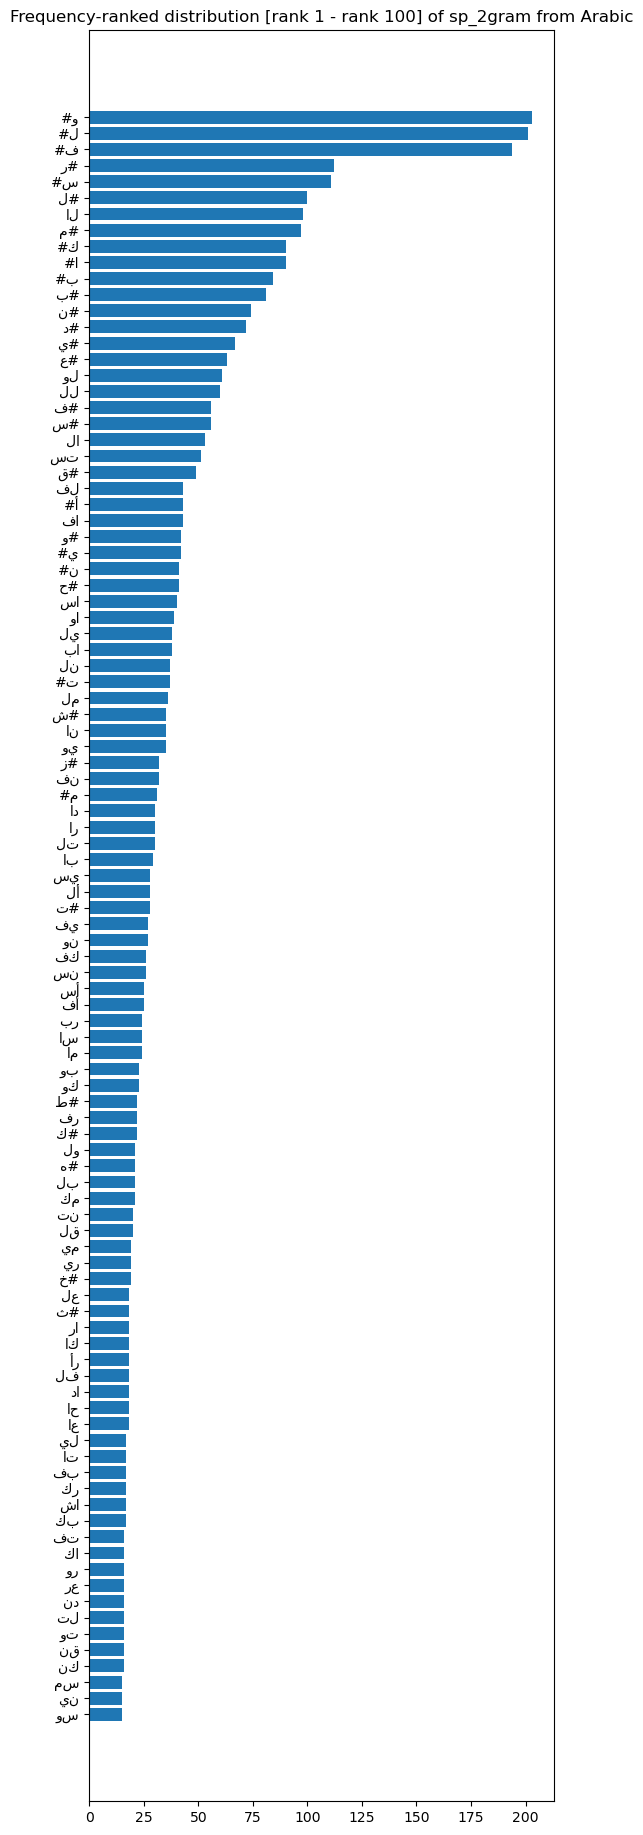

In [69]:
## frequency-ranked view
skippy = False
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [70]:
## spell 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_3gram
min_size: 1
supplement_var: sp_2gram
491193    [#لا, لاط, اطي, طيع, يع#, #ل, لا, اط, طي, يع, ...
151737    [#فأ, فأب, أبو, بوس, وس#, #ف, فأ, أب, بو, وس, ...
846568    [#وي, ويع, يعم, عمل, مل#, #و, وي, يع, عم, مل, ...
492906    [#لا, لال, الس, لس#, #ل, لا, ال, لس, س#, #, ل,...
37477     [#ال, الق, لقا, قاق, اق#, #ا, ال, لق, قا, اق, ...
                                ...                        
585275    [#وا, واف, افي, في#, #و, وا, اف, في, ي#, #, و,...
257531    [#فس, فسا, ساط, اطو, طو#, #ف, فس, سا, اط, طو, ...
461148    [#كت, كتف, تفا, فاح, اح#, #ك, كت, تف, فا, اح, ...
425774    [#في, فيغ, يغط, غطو, طو#, #ف, في, يغ, غط, طو, ...
579509    [#وأ, وأن, أنه, نهر, هر#, #و, وأ, أن, نه, هر, ...
Name: sp_3gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


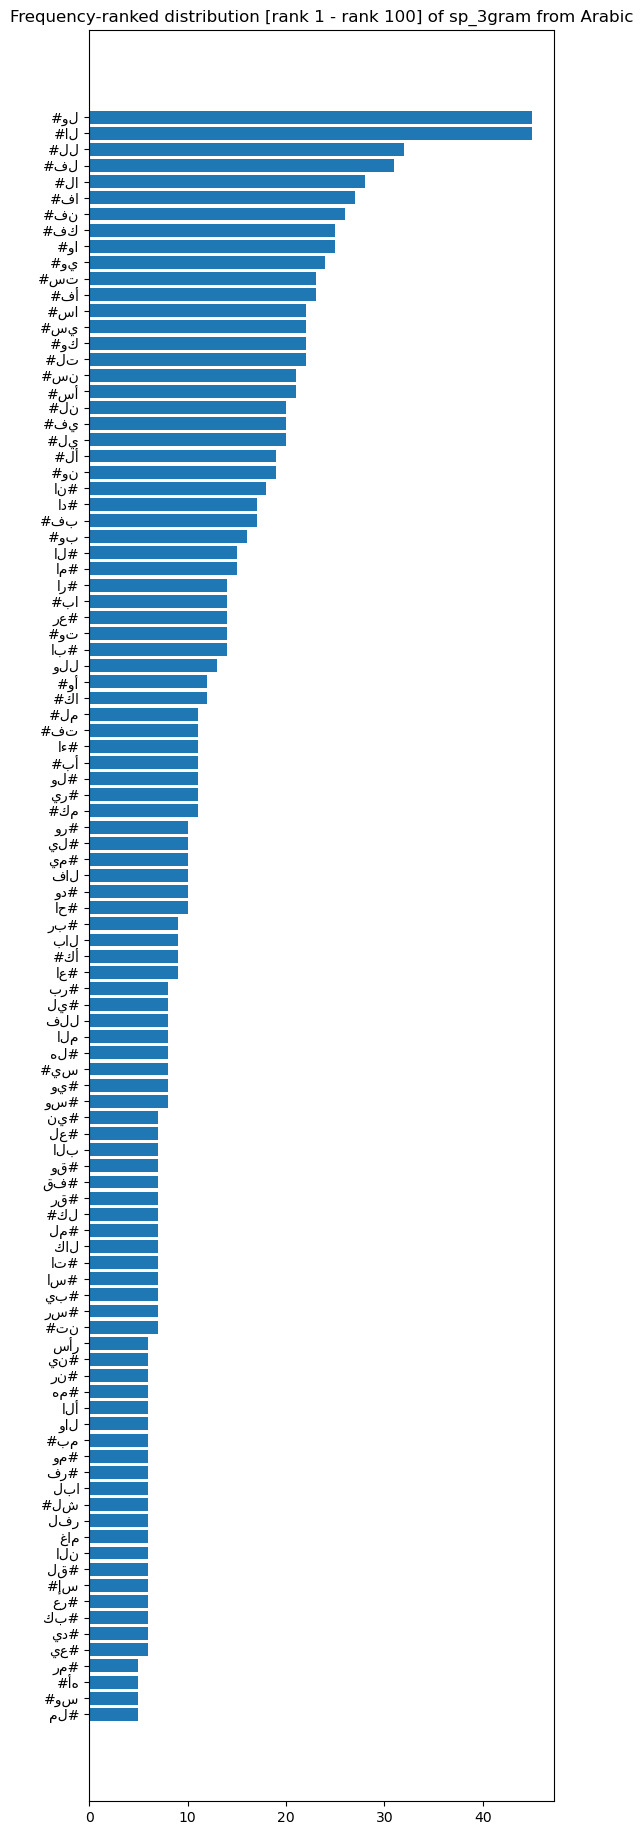

In [71]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [72]:
## spell 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_4gram
min_size: 1
supplement_var: sp_3gram
491193    [#لاط, لاطي, اطيع, طيع#, #لا, لاط, اطي, طيع, ي...
151737    [#فأب, فأبو, أبوس, بوس#, #فأ, فأب, أبو, بوس, و...
846568    [#ويع, ويعم, يعمل, عمل#, #وي, ويع, يعم, عمل, م...
492906    [#لال, لالس, الس#, #لا, لال, الس, لس#, #ل, لا,...
37477     [#الق, القا, لقاق, قاق#, #ال, الق, لقا, قاق, ا...
                                ...                        
585275    [#واف, وافي, افي#, #وا, واف, افي, في#, #و, وا,...
257531    [#فسا, فساط, ساطو, اطو#, #فس, فسا, ساط, اطو, ط...
461148    [#كتف, كتفا, تفاح, فاح#, #كت, كتف, تفا, فاح, ا...
425774    [#فيغ, فيغط, يغطو, غطو#, #في, فيغ, يغط, غطو, ط...
579509    [#وأن, وأنه, أنهر, نهر#, #وأ, وأن, أنه, نهر, ه...
Name: sp_4gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


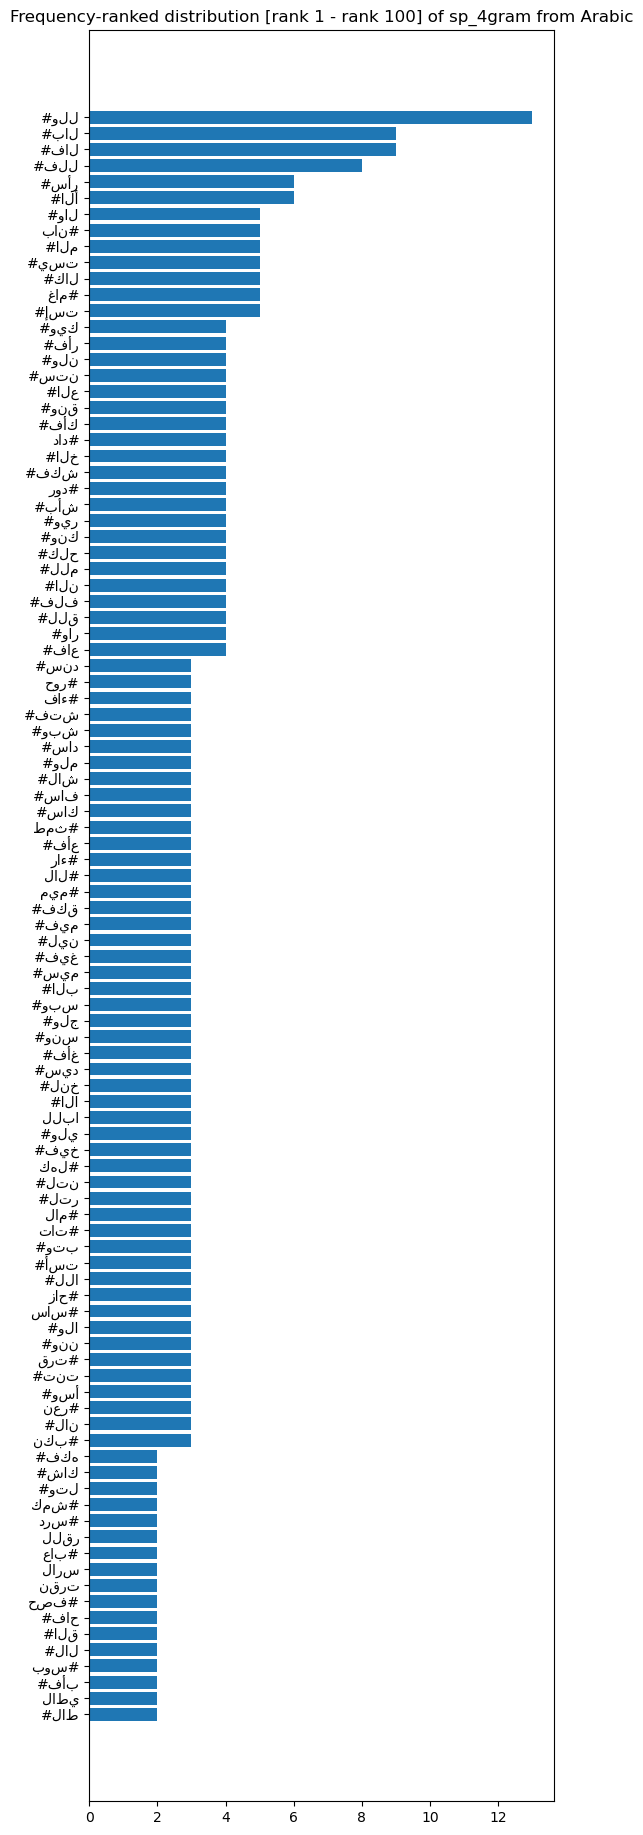

In [73]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [74]:
## spell 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_5gram
min_size: 1
supplement_var: sp_4gram
491193    [#لاطي, لاطيع, اطيع#, #لاط, لاطي, اطيع, طيع#, ...
151737    [#فأبو, فأبوس, أبوس#, #فأب, فأبو, أبوس, بوس#, ...
846568    [#ويعم, ويعمل, يعمل#, #ويع, ويعم, يعمل, عمل#, ...
492906    [#لالس, لالس#, #لال, لالس, الس#, #لا, لال, الس...
37477     [#القا, القاق, لقاق#, #الق, القا, لقاق, قاق#, ...
                                ...                        
585275    [#وافي, وافي#, #واف, وافي, افي#, #وا, واف, افي...
257531    [#فساط, فساطو, ساطو#, #فسا, فساط, ساطو, اطو#, ...
461148    [#كتفا, كتفاح, تفاح#, #كتف, كتفا, تفاح, فاح#, ...
425774    [#فيغط, فيغطو, يغطو#, #فيغ, فيغط, يغطو, غطو#, ...
579509    [#وأنه, وأنهر, أنهر#, #وأن, وأنه, أنهر, نهر#, ...
Name: sp_5gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


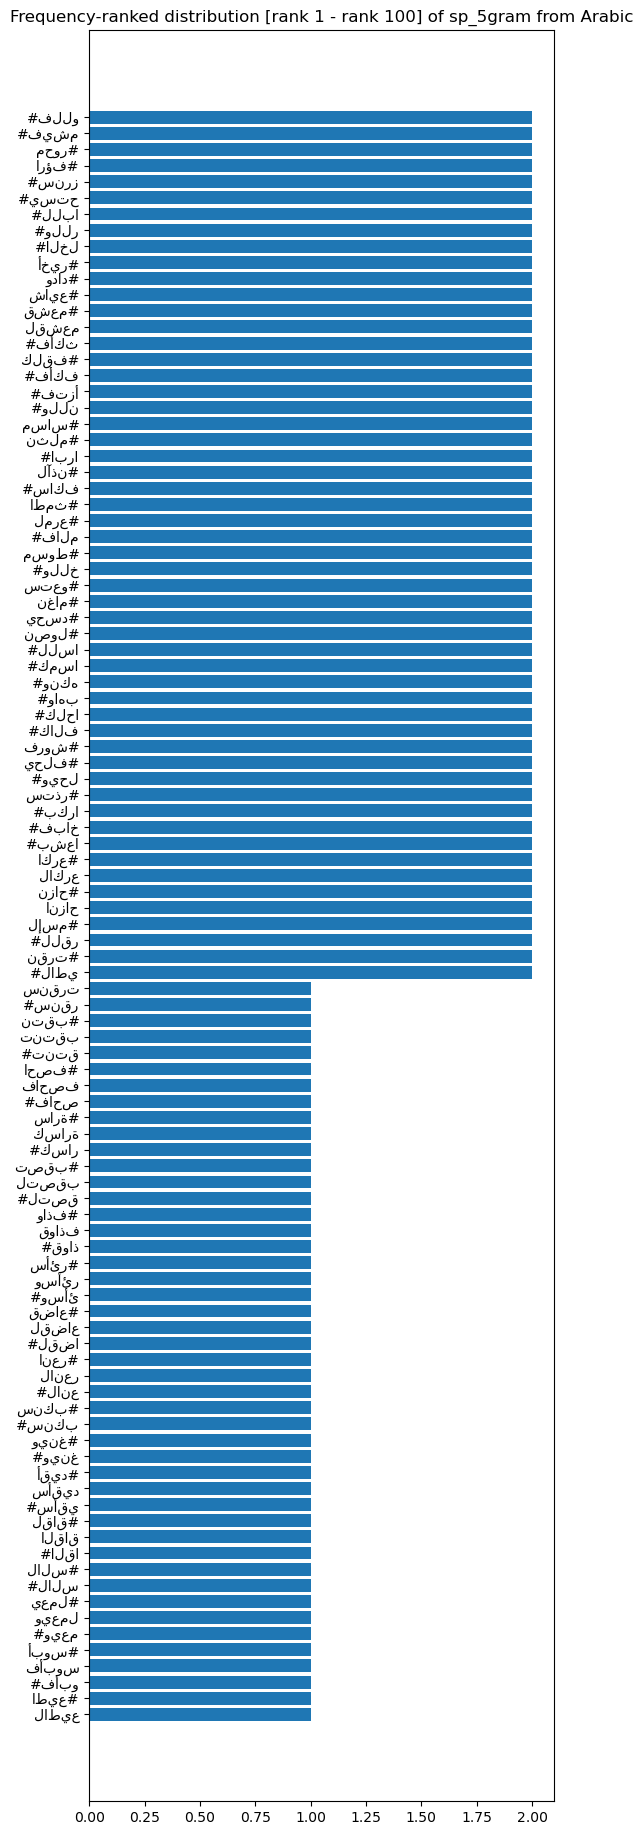

In [75]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [76]:
## spell skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy2gram
min_size: 1
supplement_var: sp_1gram
491193    [#ل, #…ا, #…ط, #…ي, #…ع, #…#, لا, ل…ط, ل…ي, ل…...
151737    [#ف, #…أ, #…ب, #…و, #…س, #…#, فأ, ف…ب, ف…و, ف…...
846568    [#و, #…ي, #…ع, #…م, #…ل, #…#, وي, و…ع, و…م, و…...
492906    [#ل, #…ا, #…ل, #…س, #…#, لا, ل…ل, ل…س, ل…#, ال...
37477     [#ا, #…ل, #…ق, #…ا, #…ق, #…#, ال, ا…ق, ا…ا, ا…...
                                ...                        
585275    [#و, #…ا, #…ف, #…ي, #…#, وا, و…ف, و…ي, و…#, اف...
257531    [#ف, #…س, #…ا, #…ط, #…و, #…#, فس, ف…ا, ف…ط, ف…...
461148    [#ك, #…ت, #…ف, #…ا, #…ح, #…#, كت, ك…ف, ك…ا, ك…...
425774    [#ف, #…ي, #…غ, #…ط, #…و, #…#, في, ف…غ, ف…ط, ف…...
579509    [#و, #…أ, #…ن, #…ه, #…ر, #…#, وأ, و…ن, و…ه, و…...
Name: sp_skippy2gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


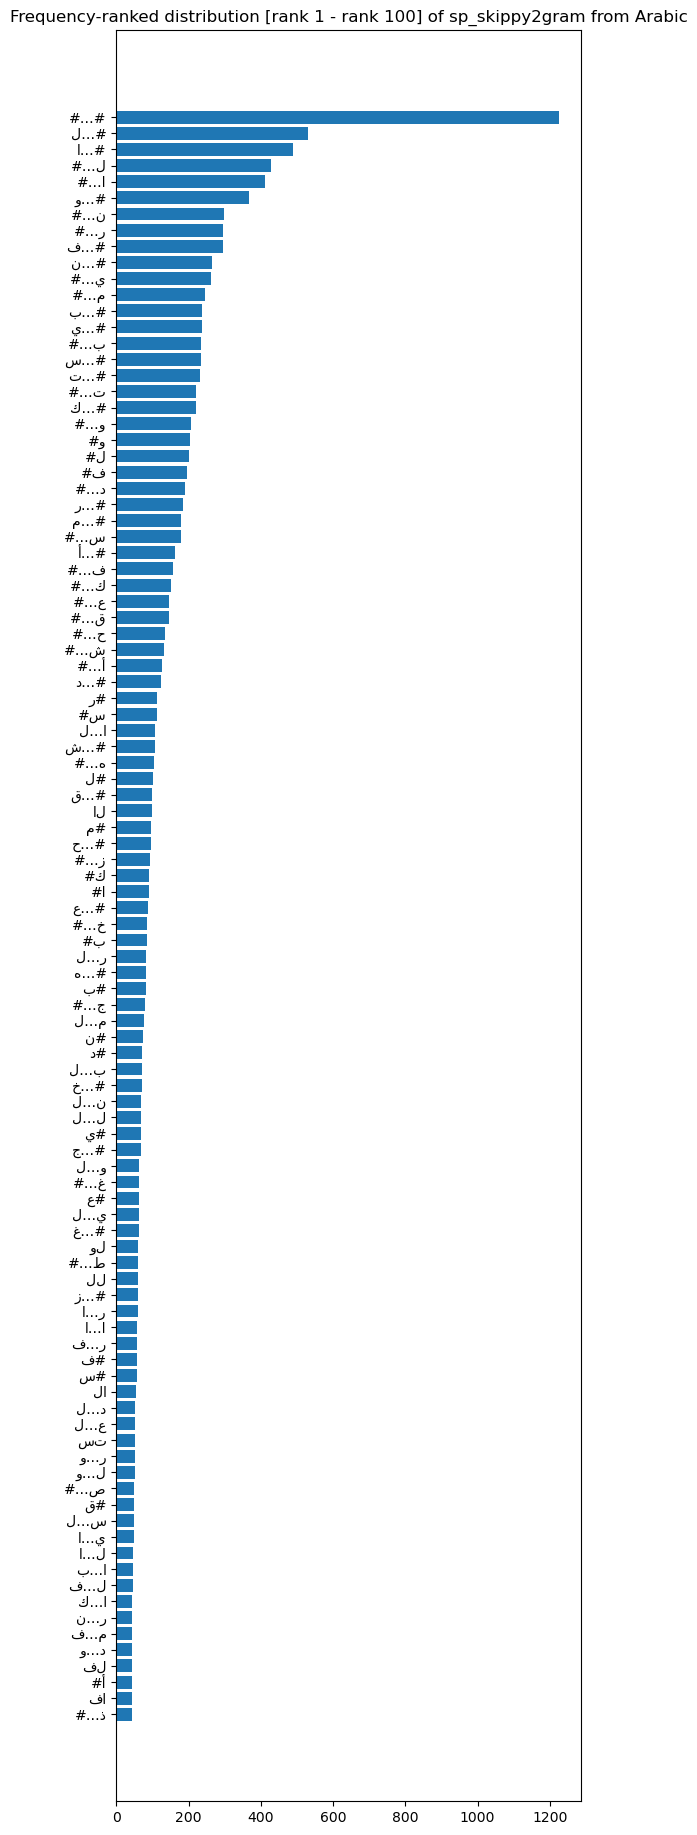

In [77]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [78]:
## spell skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy3gram
min_size: 1
supplement_var: sp_skippy2gram
491193    [#لا, #ل…ط, #ل…ي, #ل…ع, #ل…#, #…اط, #…ا…ي, #…ا...
151737    [#فأ, #ف…ب, #ف…و, #ف…س, #ف…#, #…أب, #…أ…و, #…أ...
846568    [#وي, #و…ع, #و…م, #و…ل, #و…#, #…يع, #…ي…م, #…ي...
492906    [#لا, #ل…ل, #ل…س, #ل…#, #…ال, #…ا…س, #…ا…#, #…...
37477     [#ال, #ا…ق, #ا…ا, #ا…ق, #ا…#, #…لق, #…ل…ا, #…ل...
                                ...                        
585275    [#وا, #و…ف, #و…ي, #و…#, #…اف, #…ا…ي, #…ا…#, #…...
257531    [#فس, #ف…ا, #ف…ط, #ف…و, #ف…#, #…سا, #…س…ط, #…س...
461148    [#كت, #ك…ف, #ك…ا, #ك…ح, #ك…#, #…تف, #…ت…ا, #…ت...
425774    [#في, #ف…غ, #ف…ط, #ف…و, #ف…#, #…يغ, #…ي…ط, #…ي...
579509    [#وأ, #و…ن, #و…ه, #و…ر, #و…#, #…أن, #…أ…ه, #…أ...
Name: sp_skippy3gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


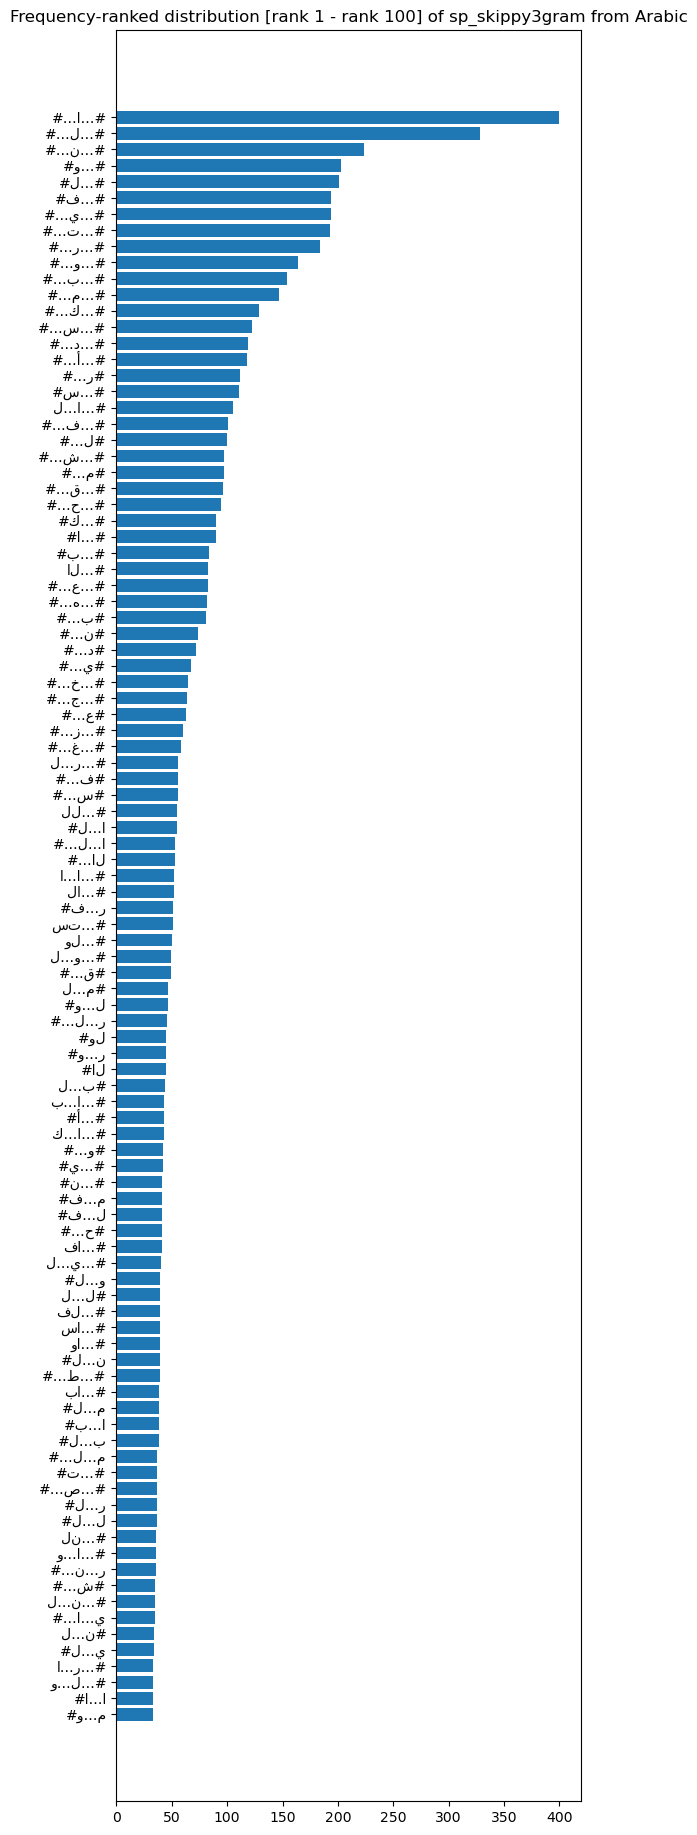

In [79]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [80]:
## spell skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy4gram
min_size: 1
supplement_var: sp_skippy3gram
491193    [#لاط, #لا…ي, #لا…ع, #لا…#, #ل…طي, #ل…ط…ع, #ل…...
151737    [#فأب, #فأ…و, #فأ…س, #فأ…#, #ف…بو, #ف…ب…س, #ف…...
846568    [#ويع, #وي…م, #وي…ل, #وي…#, #و…عم, #و…ع…ل, #و…...
492906    [#لال, #لا…س, #لا…#, #ل…لس, #ل…ل…#, #ل…س#, #…ا...
37477     [#الق, #ال…ا, #ال…ق, #ال…#, #ا…قا, #ا…ق…ق, #ا…...
                                ...                        
585275    [#واف, #وا…ي, #وا…#, #و…في, #و…ف…#, #و…ي#, #…ا...
257531    [#فسا, #فس…ط, #فس…و, #فس…#, #ف…اط, #ف…ا…و, #ف…...
461148    [#كتف, #كت…ا, #كت…ح, #كت…#, #ك…فا, #ك…ف…ح, #ك…...
425774    [#فيغ, #في…ط, #في…و, #في…#, #ف…غط, #ف…غ…و, #ف…...
579509    [#وأن, #وأ…ه, #وأ…ر, #وأ…#, #و…نه, #و…ن…ر, #و…...
Name: sp_skippy4gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


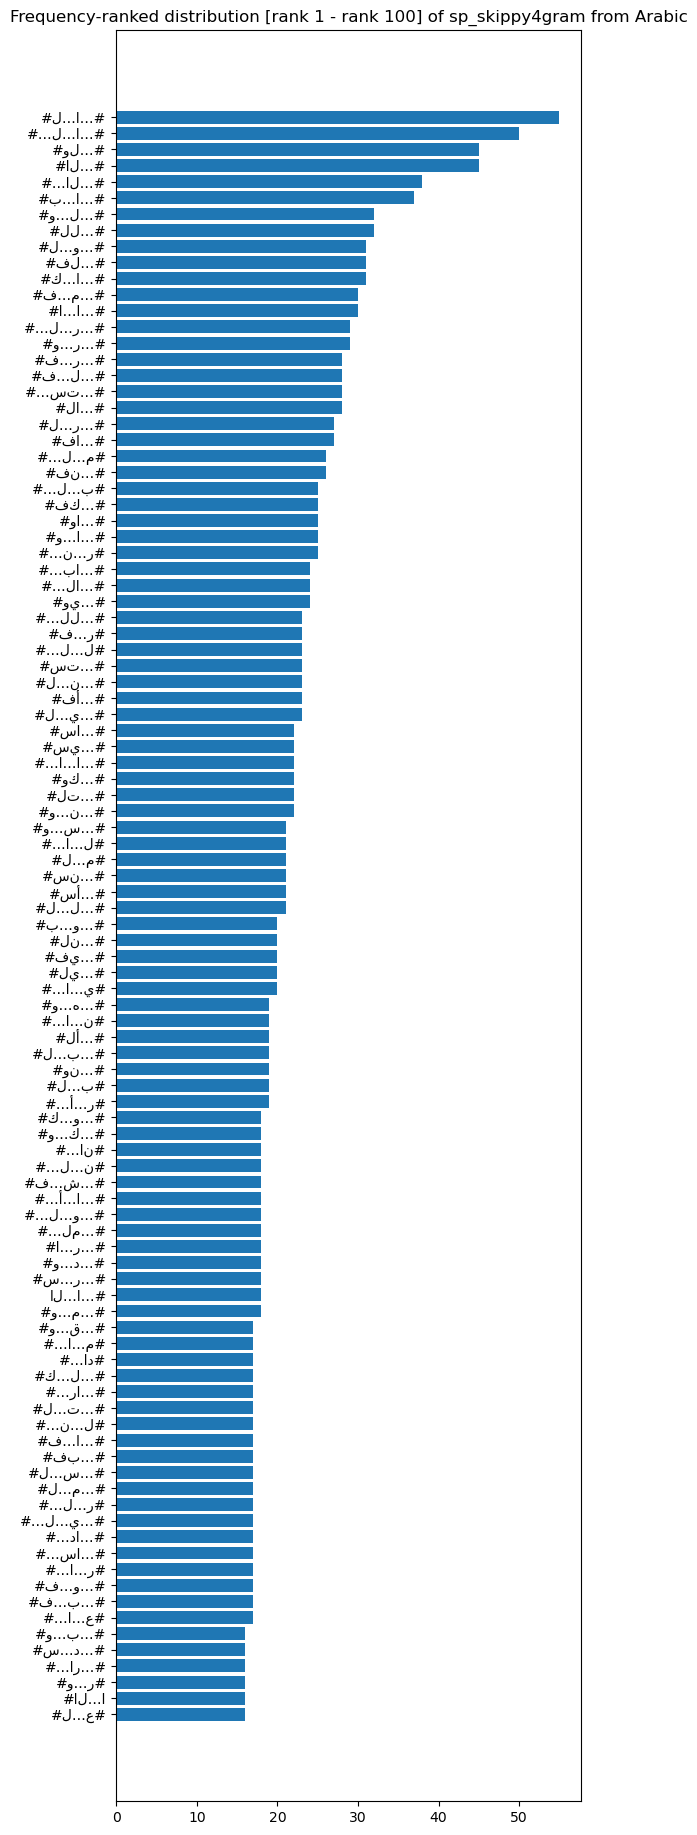

In [81]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [82]:
## spell skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy5gram
min_size: 1
supplement_var: sp_skippy4gram
491193    [#لاطي, #لاط…ع, #لاط…#, #لا…يع, #لا…ي…#, #لا…ع...
151737    [#فأبو, #فأب…س, #فأب…#, #فأ…وس, #فأ…و…#, #فأ…س...
846568    [#ويعم, #ويع…ل, #ويع…#, #وي…مل, #وي…م…#, #وي…ل...
492906    [#لالس, #لال…#, #لا…س#, #ل…لس#, #…الس#, لالس#,...
37477     [#القا, #الق…ق, #الق…#, #ال…اق, #ال…ا…#, #ال…ق...
                                ...                        
585275    [#وافي, #واف…#, #وا…ي#, #و…في#, #…افي#, وافي#,...
257531    [#فساط, #فسا…و, #فسا…#, #فس…طو, #فس…ط…#, #فس…و...
461148    [#كتفا, #كتف…ح, #كتف…#, #كت…اح, #كت…ا…#, #كت…ح...
425774    [#فيغط, #فيغ…و, #فيغ…#, #في…طو, #في…ط…#, #في…و...
579509    [#وأنه, #وأن…ر, #وأن…#, #وأ…هر, #وأ…ه…#, #وأ…ر...
Name: sp_skippy5gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


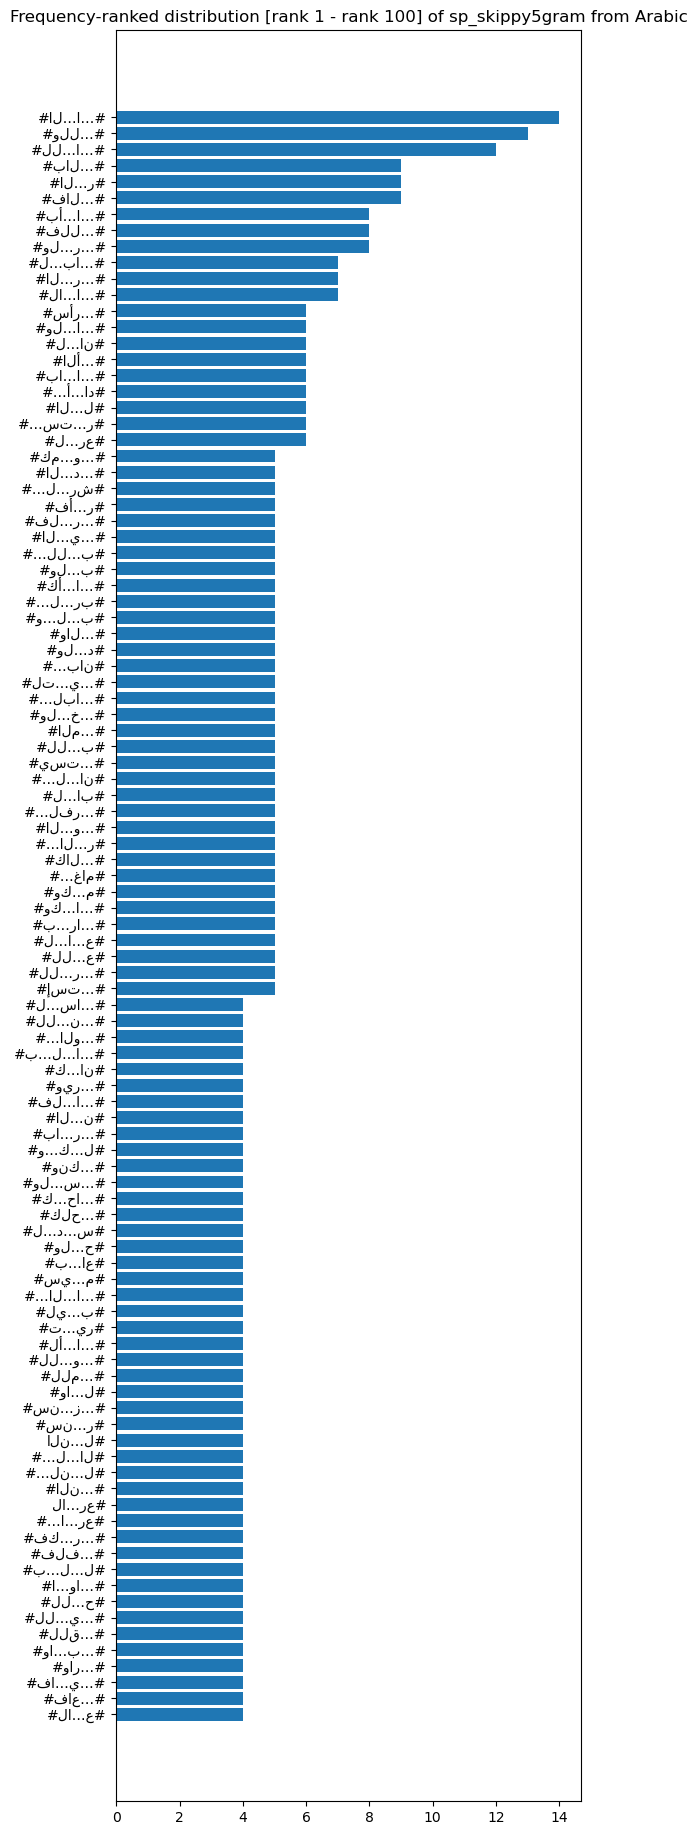

In [83]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

# Sound

In [84]:
## sound 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_2gram
min_size: 1
supplement_var: sn_1gram
491193    [#l, li, iʔ, ʔu, ut, tˤ, ˤi, iː, ːʕ, ʕ#, #, l,...
151737    [#f, fa, aʔ, ʔa, ab, bu, uː, ːs, s#, #, f, a, ...
846568    [#w, we, eɪ, ɪa, aʕ, ʕm, ma, al, l#, #, w, e, ...
492906    [#l, la, aʔ, ʔa, al, ll, la, as, sa, a#, #, l,...
37477     [#a, aː, ːl, lq, qa, aː, ːq, q#, #, a, ː, l, q...
                                ...                        
585275    [#w, wa, aː, ːf, fi, iː, ː#, #, w, a, ː, f, i,...
257531    [#f, fa, as, sa, aʔ, ʔa, at, tˤ, ˤw, w#, #, f,...
461148    [#k, ka, at, tu, uf, ff, fa, aː, ːħ, ħ#, #, k,...
425774    [#f, fe, eɪ, ɪa, aɣ, ɣt, tˤ, ˤu, uː, ː#, #, f,...
579509    [#w, wa, aʔ, ʔa, an, nh, hu, ur, r#, #, w, a, ...
Name: sn_2gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


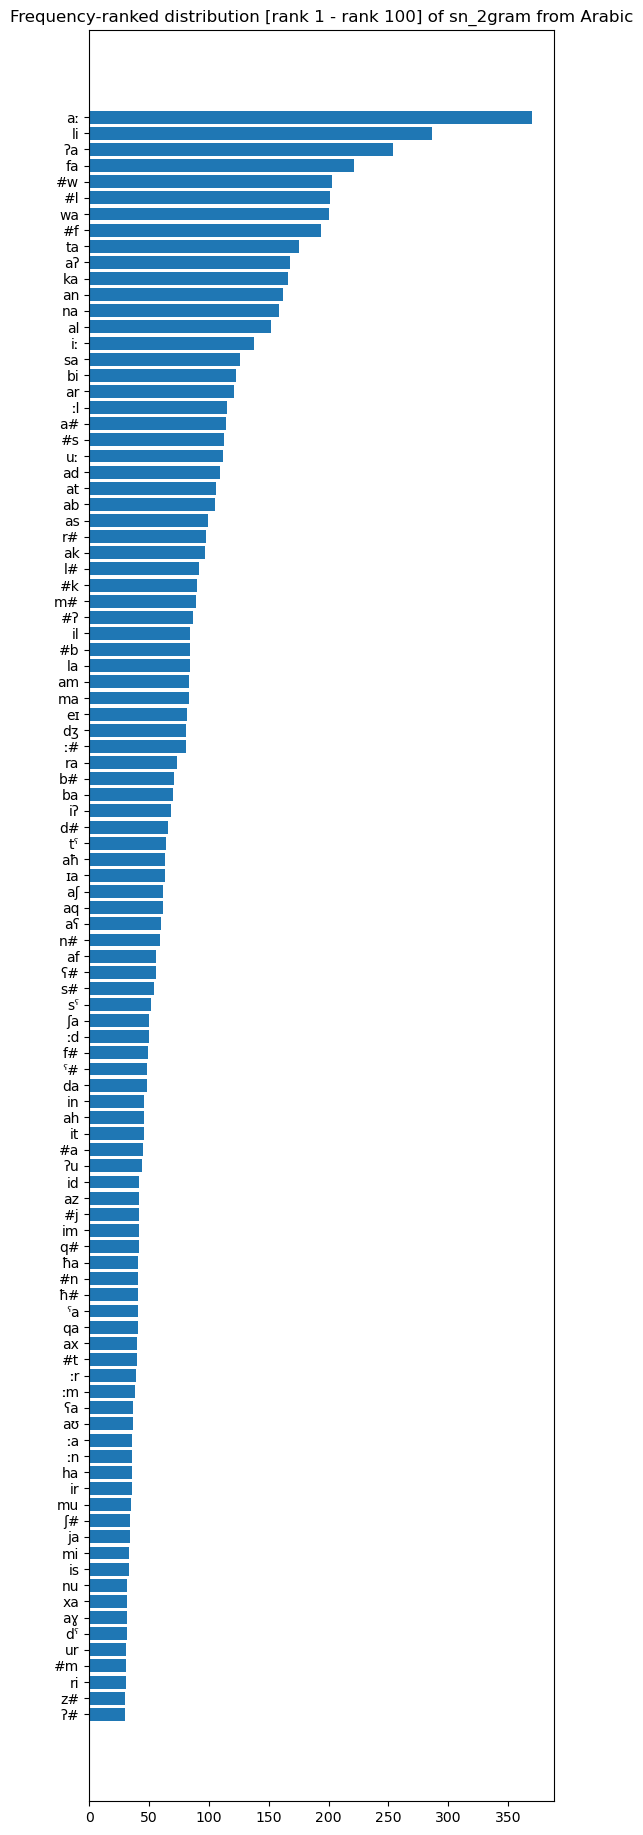

In [85]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [86]:
## sound 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_3gram
min_size: 1
supplement_var: sn_2gram
491193    [#li, liʔ, iʔu, ʔut, utˤ, tˤi, ˤiː, iːʕ, ːʕ#, ...
151737    [#fa, faʔ, aʔa, ʔab, abu, buː, uːs, ːs#, #f, f...
846568    [#we, weɪ, eɪa, ɪaʕ, aʕm, ʕma, mal, al#, #w, w...
492906    [#la, laʔ, aʔa, ʔal, all, lla, las, asa, sa#, ...
37477     [#aː, aːl, ːlq, lqa, qaː, aːq, ːq#, #a, aː, ːl...
                                ...                        
585275    [#wa, waː, aːf, ːfi, fiː, iː#, #w, wa, aː, ːf,...
257531    [#fa, fas, asa, saʔ, aʔa, ʔat, atˤ, tˤw, ˤw#, ...
461148    [#ka, kat, atu, tuf, uff, ffa, faː, aːħ, ːħ#, ...
425774    [#fe, feɪ, eɪa, ɪaɣ, aɣt, ɣtˤ, tˤu, ˤuː, uː#, ...
579509    [#wa, waʔ, aʔa, ʔan, anh, nhu, hur, ur#, #w, w...
Name: sn_3gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


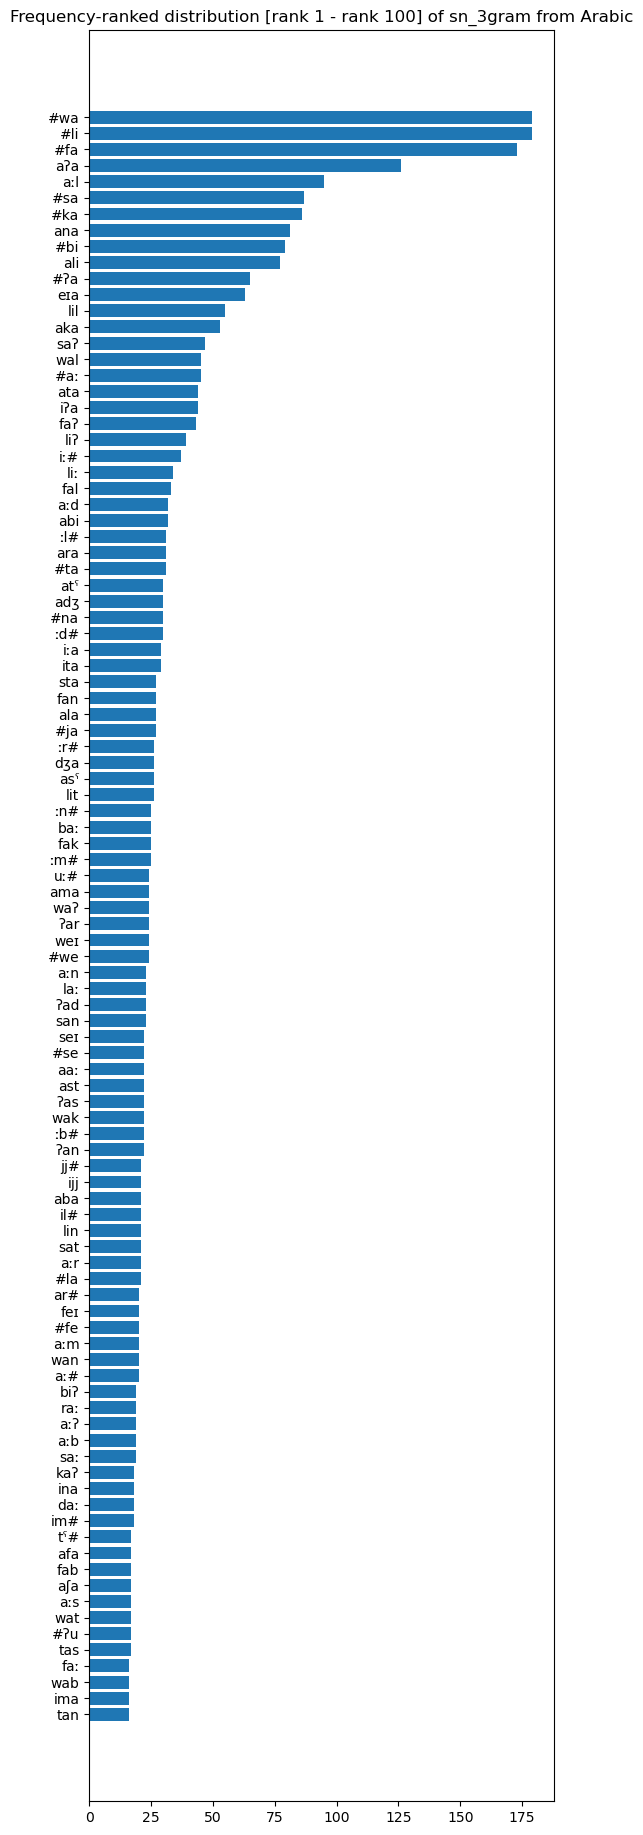

In [87]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [88]:
## sound 4grams
add_ngram_to_df(df, n_for_ngram = 4, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_4gram
min_size: 1
supplement_var: sn_3gram
491193    [#liʔ, liʔu, iʔut, ʔutˤ, utˤi, tˤiː, ˤiːʕ, iːʕ...
151737    [#faʔ, faʔa, aʔab, ʔabu, abuː, buːs, uːs#, #fa...
846568    [#weɪ, weɪa, eɪaʕ, ɪaʕm, aʕma, ʕmal, mal#, #we...
492906    [#laʔ, laʔa, aʔal, ʔall, alla, llas, lasa, asa...
37477     [#aːl, aːlq, ːlqa, lqaː, qaːq, aːq#, #aː, aːl,...
                                ...                        
585275    [#waː, waːf, aːfi, ːfiː, fiː#, #wa, waː, aːf, ...
257531    [#fas, fasa, asaʔ, saʔa, aʔat, ʔatˤ, atˤw, tˤw...
461148    [#kat, katu, atuf, tuff, uffa, ffaː, faːħ, aːħ...
425774    [#feɪ, feɪa, eɪaɣ, ɪaɣt, aɣtˤ, ɣtˤu, tˤuː, ˤuː...
579509    [#waʔ, waʔa, aʔan, ʔanh, anhu, nhur, hur#, #wa...
Name: sn_4gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


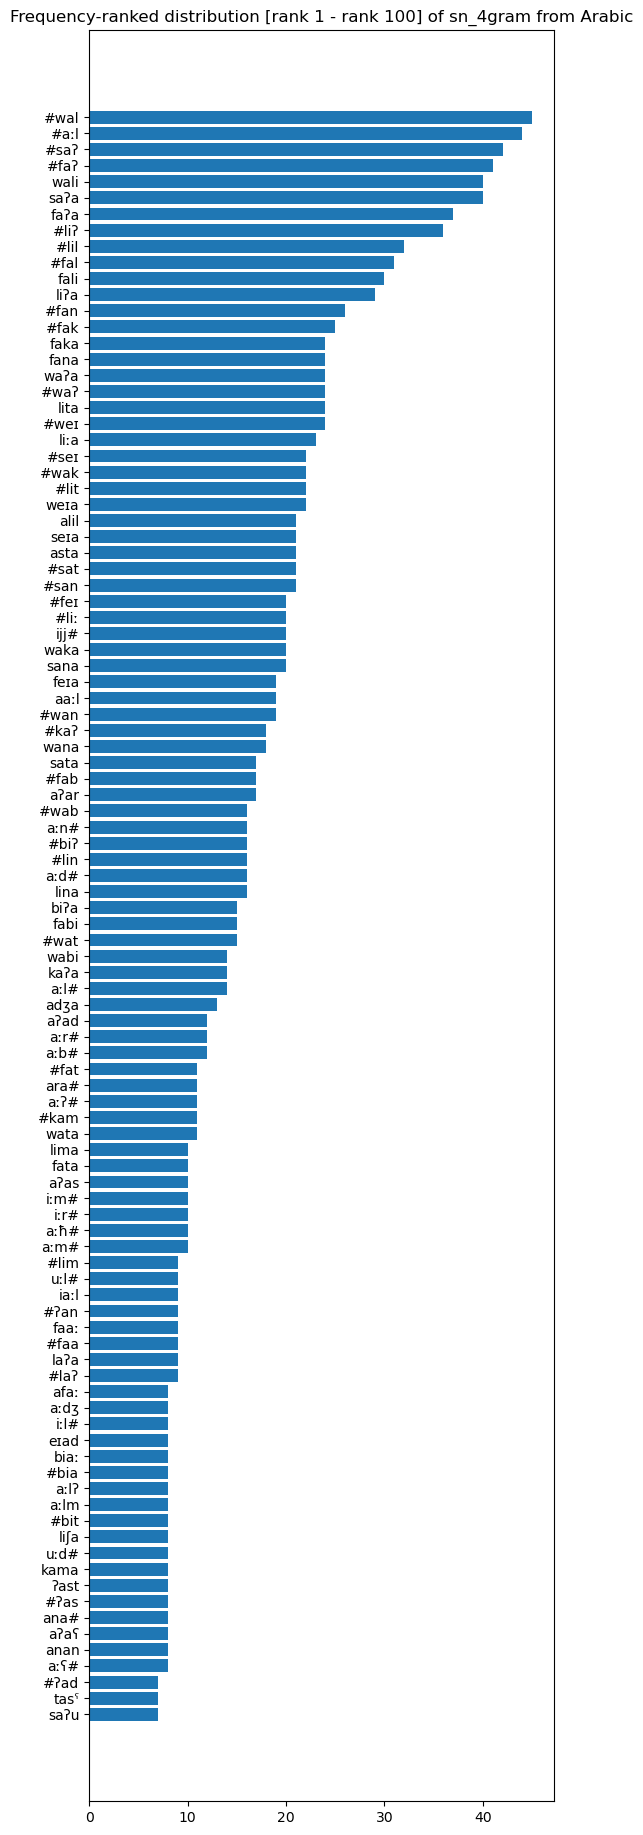

In [89]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [90]:
## sound 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_5gram
min_size: 1
supplement_var: sn_4gram
491193    [#liʔu, liʔut, iʔutˤ, ʔutˤi, utˤiː, tˤiːʕ, ˤiː...
151737    [#faʔa, faʔab, aʔabu, ʔabuː, abuːs, buːs#, #fa...
846568    [#weɪa, weɪaʕ, eɪaʕm, ɪaʕma, aʕmal, ʕmal#, #we...
492906    [#laʔa, laʔal, aʔall, ʔalla, allas, llasa, las...
37477     [#aːlq, aːlqa, ːlqaː, lqaːq, qaːq#, #aːl, aːlq...
                                ...                        
585275    [#waːf, waːfi, aːfiː, ːfiː#, #waː, waːf, aːfi,...
257531    [#fasa, fasaʔ, asaʔa, saʔat, aʔatˤ, ʔatˤw, atˤ...
461148    [#katu, katuf, atuff, tuffa, uffaː, ffaːħ, faː...
425774    [#feɪa, feɪaɣ, eɪaɣt, ɪaɣtˤ, aɣtˤu, ɣtˤuː, tˤu...
579509    [#waʔa, waʔan, aʔanh, ʔanhu, anhur, nhur#, #wa...
Name: sn_5gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


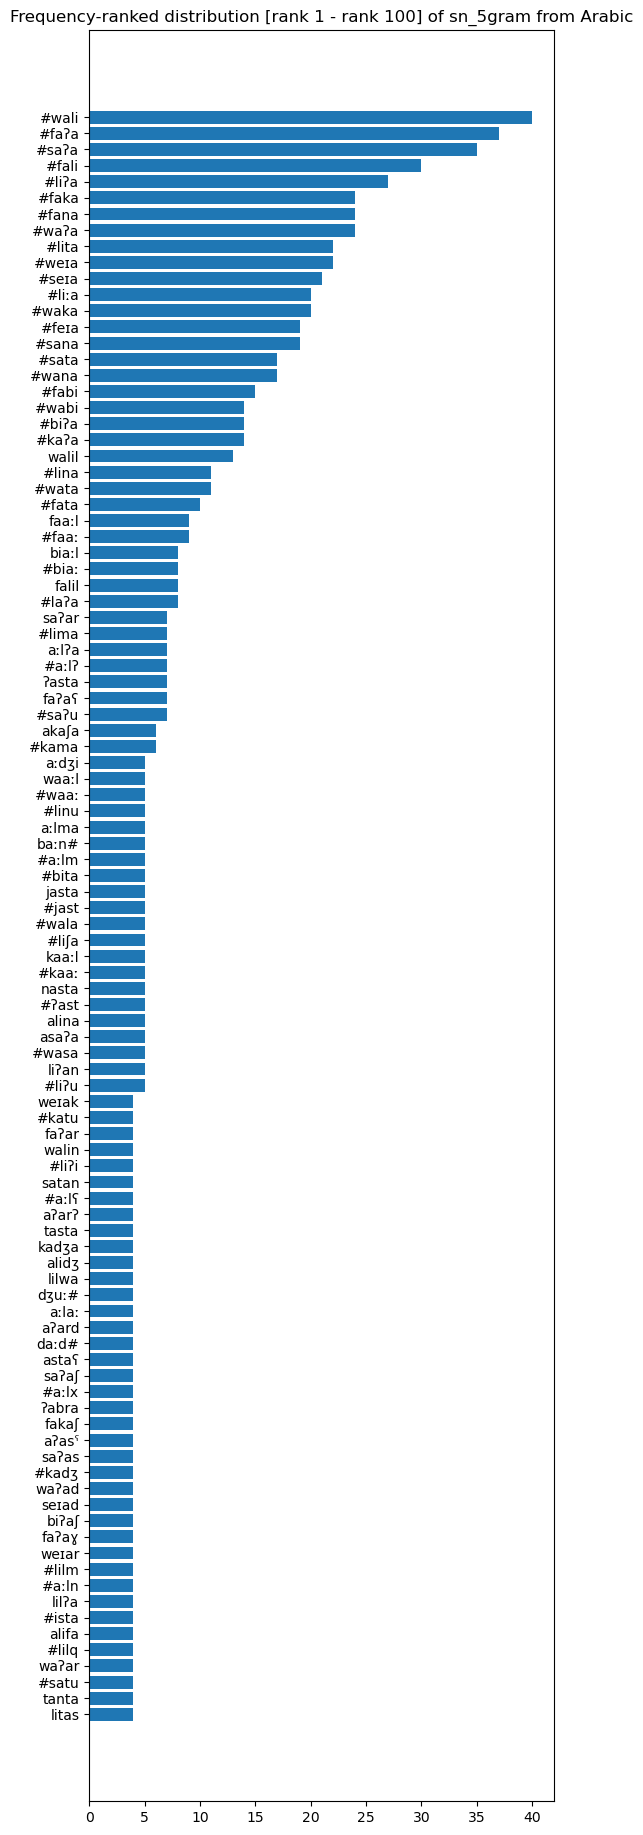

In [91]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [92]:
## sound skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy2gram
min_size: 1
supplement_var: sn_1gram
491193    [#l, #…i, #…ʔ, #…u, #…t, #…ˤ, #…i, #…ː, #…ʕ, #...
151737    [#f, #…a, #…ʔ, #…a, #…b, #…u, #…ː, #…s, #…#, f...
846568    [#w, #…e, #…ɪ, #…a, #…ʕ, #…m, #…a, #…l, #…#, w...
492906    [#l, #…a, #…ʔ, #…a, #…l, #…l, #…a, #…s, #…a, #...
37477     [#a, #…ː, #…l, #…q, #…a, #…ː, #…q, #…#, aː, a…...
                                ...                        
585275    [#w, #…a, #…ː, #…f, #…i, #…ː, #…#, wa, w…ː, w…...
257531    [#f, #…a, #…s, #…a, #…ʔ, #…a, #…t, #…ˤ, #…w, #...
461148    [#k, #…a, #…t, #…u, #…f, #…f, #…a, #…ː, #…ħ, #...
425774    [#f, #…e, #…ɪ, #…a, #…ɣ, #…t, #…ˤ, #…u, #…ː, #...
579509    [#w, #…a, #…ʔ, #…a, #…n, #…h, #…u, #…r, #…#, w...
Name: sn_skippy2gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


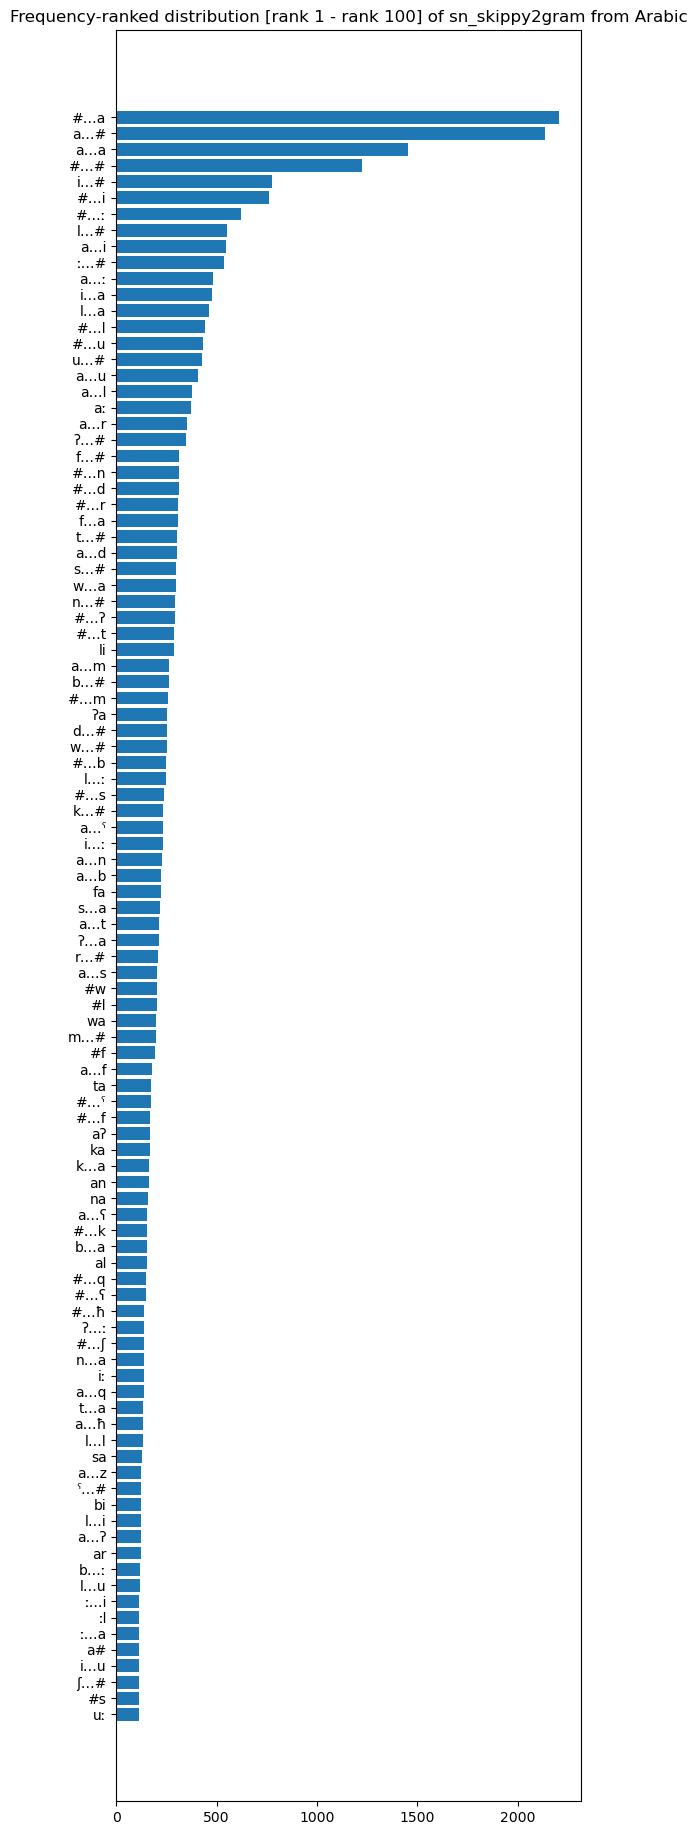

In [93]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [94]:
## sound skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy3gram
min_size: 1
supplement_var: sn_skippy2gram
491193    [#li, #l…ʔ, #l…u, #l…t, #l…ˤ, #l…i, #l…ː, #l…ʕ...
151737    [#fa, #f…ʔ, #f…a, #f…b, #f…u, #f…ː, #f…s, #f…#...
846568    [#we, #w…ɪ, #w…a, #w…ʕ, #w…m, #w…a, #w…l, #w…#...
492906    [#la, #l…ʔ, #l…a, #l…l, #l…l, #l…a, #l…s, #l…a...
37477     [#aː, #a…l, #a…q, #a…a, #a…ː, #a…q, #a…#, #…ːl...
                                ...                        
585275    [#wa, #w…ː, #w…f, #w…i, #w…ː, #w…#, #…aː, #…a…...
257531    [#fa, #f…s, #f…a, #f…ʔ, #f…a, #f…t, #f…ˤ, #f…w...
461148    [#ka, #k…t, #k…u, #k…f, #k…f, #k…a, #k…ː, #k…ħ...
425774    [#fe, #f…ɪ, #f…a, #f…ɣ, #f…t, #f…ˤ, #f…u, #f…ː...
579509    [#wa, #w…ʔ, #w…a, #w…n, #w…h, #w…u, #w…r, #w…#...
Name: sn_skippy3gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


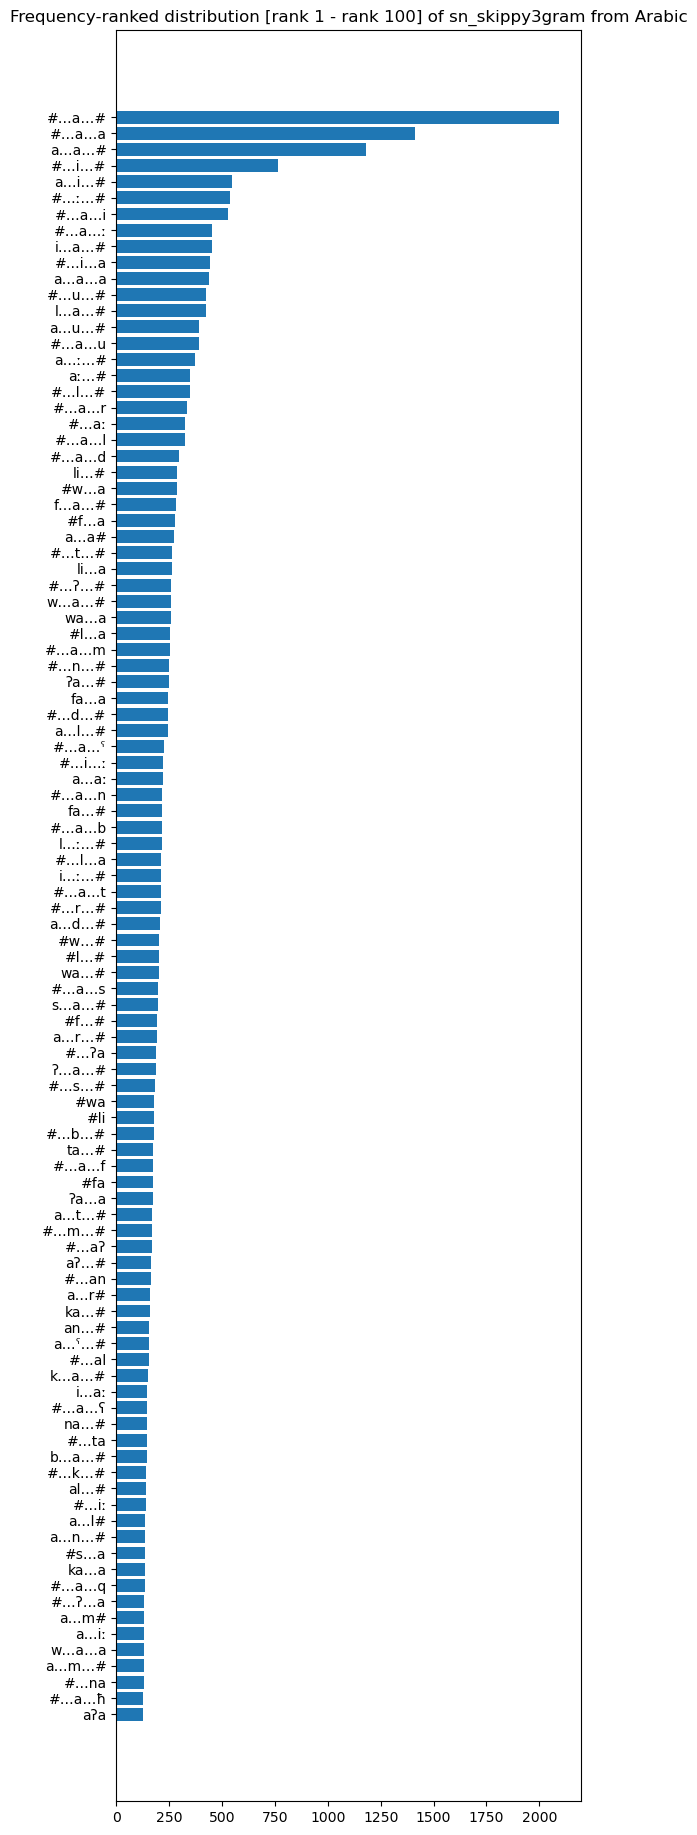

In [95]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [96]:
## sound skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sn_", skippy = True, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy4gram
min_size: 1
supplement_var: sn_skippy3gram
491193    [#liʔ, #li…u, #li…t, #li…ˤ, #li…i, #li…ː, #li…...
151737    [#faʔ, #fa…a, #fa…b, #fa…u, #fa…ː, #fa…s, #fa…...
846568    [#weɪ, #we…a, #we…ʕ, #we…m, #we…a, #we…l, #we…...
492906    [#laʔ, #la…a, #la…l, #la…l, #la…a, #la…s, #la…...
37477     [#aːl, #aː…q, #aː…a, #aː…ː, #aː…q, #aː…#, #a…l...
                                ...                        
585275    [#waː, #wa…f, #wa…i, #wa…ː, #wa…#, #w…ːf, #w…ː...
257531    [#fas, #fa…a, #fa…ʔ, #fa…a, #fa…t, #fa…ˤ, #fa…...
461148    [#kat, #ka…u, #ka…f, #ka…f, #ka…a, #ka…ː, #ka…...
425774    [#feɪ, #fe…a, #fe…ɣ, #fe…t, #fe…ˤ, #fe…u, #fe…...
579509    [#waʔ, #wa…a, #wa…n, #wa…h, #wa…u, #wa…r, #wa…...
Name: sn_skippy4gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


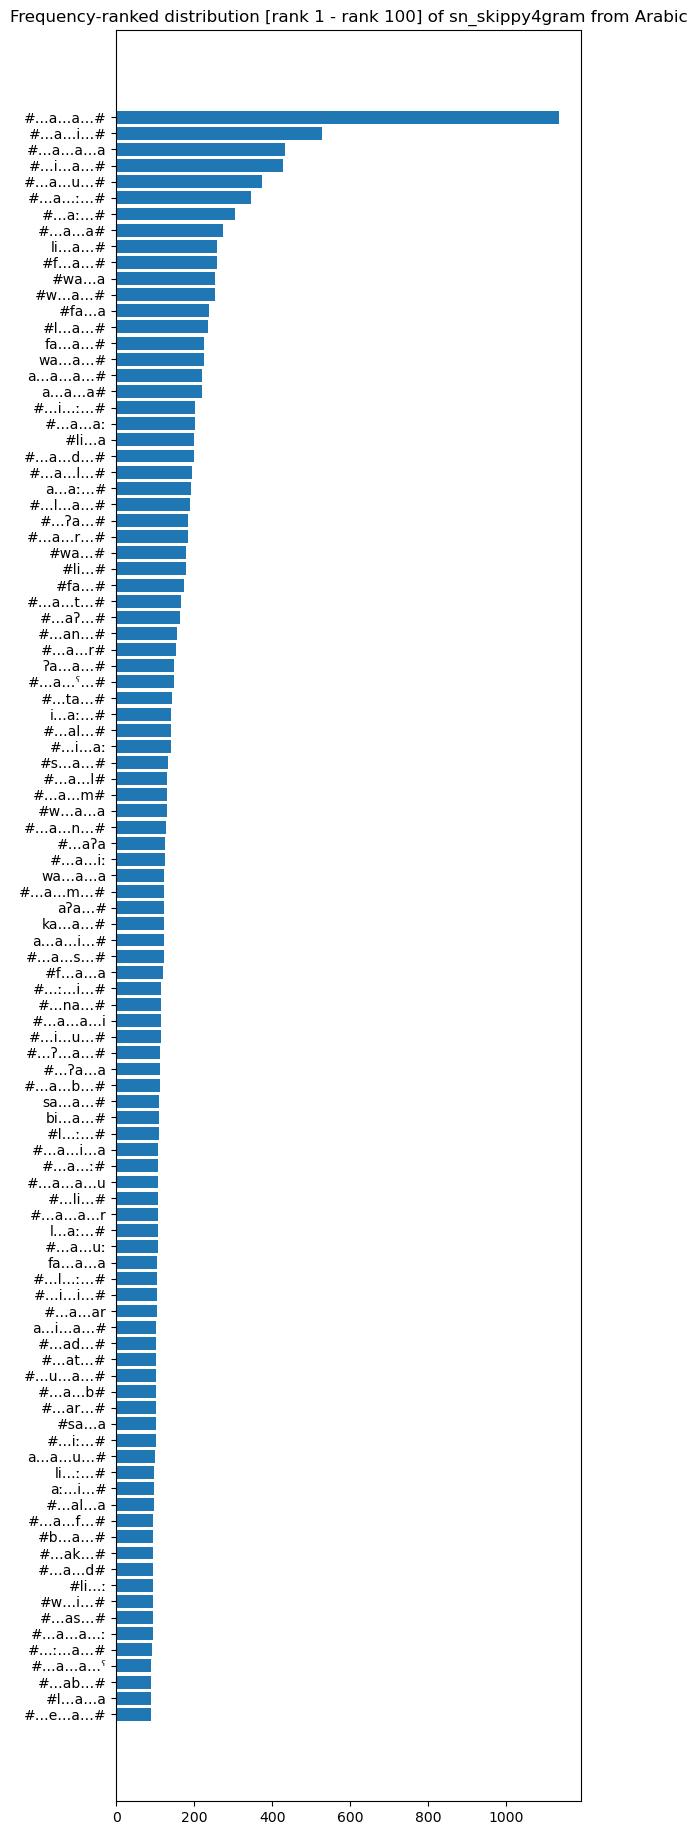

In [97]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [98]:
## sound skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy5gram
min_size: 1
supplement_var: sn_skippy4gram
491193    [#liʔu, #liʔ…t, #liʔ…ˤ, #liʔ…i, #liʔ…ː, #liʔ…ʕ...
151737    [#faʔa, #faʔ…b, #faʔ…u, #faʔ…ː, #faʔ…s, #faʔ…#...
846568    [#weɪa, #weɪ…ʕ, #weɪ…m, #weɪ…a, #weɪ…l, #weɪ…#...
492906    [#laʔa, #laʔ…l, #laʔ…l, #laʔ…a, #laʔ…s, #laʔ…a...
37477     [#aːlq, #aːl…a, #aːl…ː, #aːl…q, #aːl…#, #aː…qa...
                                ...                        
585275    [#waːf, #waː…i, #waː…ː, #waː…#, #wa…fi, #wa…f…...
257531    [#fasa, #fas…ʔ, #fas…a, #fas…t, #fas…ˤ, #fas…w...
461148    [#katu, #kat…f, #kat…f, #kat…a, #kat…ː, #kat…ħ...
425774    [#feɪa, #feɪ…ɣ, #feɪ…t, #feɪ…ˤ, #feɪ…u, #feɪ…ː...
579509    [#waʔa, #waʔ…n, #waʔ…h, #waʔ…u, #waʔ…r, #waʔ…#...
Name: sn_skippy5gram, Length: 1226, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


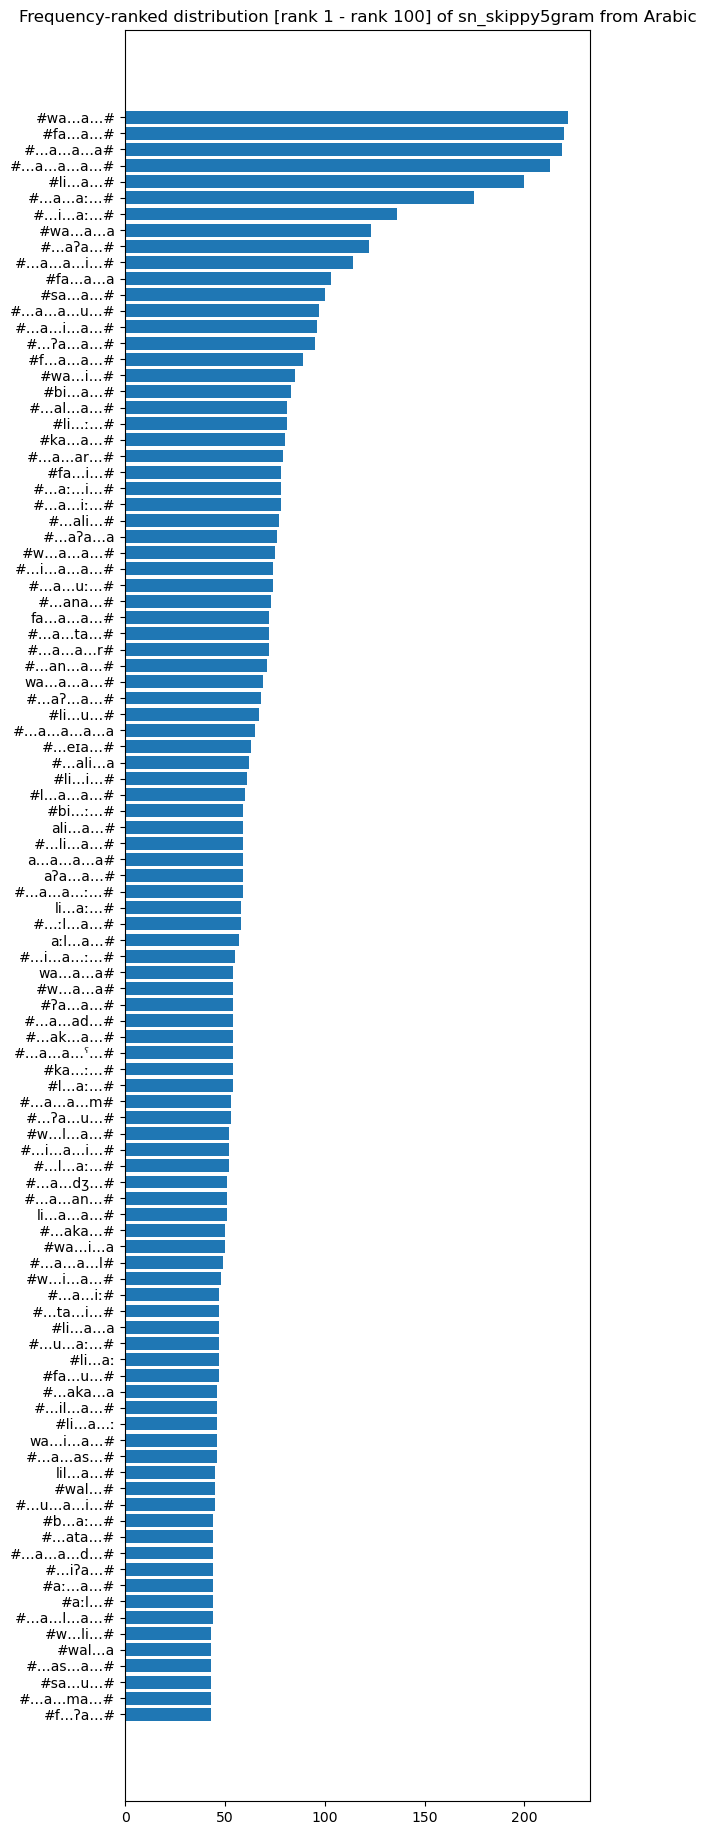

In [99]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)